Life Expectancy Data Data

Goal : Classifying the low Life expectancy i.e < 50 years based on the given data 

data shape (2938, 22)

categorical : 2 

 miniority: majority class = 1 : 22

missing data :  ~ 7%

Evaluation Metric: Precision-Recall

Chose Precision recall as this is an imbalanced dataset where i am interested in how well the model classifies less life expectancy ( minority class) i also do not want low life expectancy to be wrongly classified as high and vice versa as that would not be desired  as both classes are important i.e both precision and recall are important and i am least interested in how many number of  the majority classs are correctly classified ( True negative ) 

Precision recall doesnot include true negatives in the calculation and focusses on the remaining three which i am interested in.

F1 scoring provides precision recall.


naive model 

Mean Cross-validation scores: 0.08789646486359107

Naive Algorithm Test Performance:  0.03571428571428571

Best model is xgbc with Oversample using Adaptive Synthetic

Best Mean Cross Validation Score is 0.8057486644413295

Best Parameters: {'ada__n_neighbors': 3, 'xgbc__learning_rate': 0.6, 'xgbc__max_depth': 4, 'xgbc__min_child_weight': 1, 
'xgbc__n_estimators': 100, 'xgbc__subsample': 0.8}

Train score is 1.0

Test score is 0.7234042553191489

Val score is 0.775




In [447]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

# Data


In [448]:
data1 = pd.read_csv('Life Expectancy Data.csv')

data1.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [449]:
data1.shape

(2938, 22)

In [450]:
data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [451]:
#inserting null values
data = data1.mask(np.random.random(data1.shape) < .05)

In [452]:
 data['Life expectancy '] = data1['Life expectancy ']

In [453]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [454]:
data['low Life expectancy'] = 1
data.loc[(data['Life expectancy '] > 0) & (data['Life expectancy '] <= 50), 'low Life expectancy'] = 1
data.loc[(data['Life expectancy '] > 50) , 'low Life expectancy'] = 0

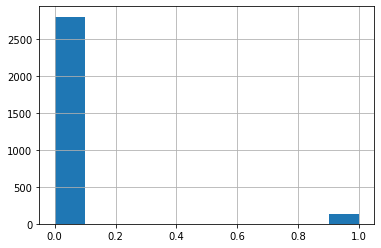

In [455]:
data['low Life expectancy'].hist()

In [456]:
pd.crosstab(index=data['low Life expectancy'],     # Make a crosstab
                      columns="count") 

col_0,count
low Life expectancy,
0,2801
1,137


In [705]:
137/2801

0.04891110317743663

In [458]:
data.drop('Life expectancy ',axis=1,inplace=True)

In [459]:
# let's inspect the variable values

for var in data.columns:
    print(var, data[var].unique()[0:20], '\n')

Country ['Afghanistan' 'Albania' nan 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan'] 

Year [2015. 2014. 2013. 2012. 2011. 2010. 2009. 2008. 2007. 2006. 2005. 2004.
 2003. 2002. 2001. 2000.   nan] 

Status ['Developing' nan 'Developed'] 

Adult Mortality [263. 271. 268. 272. 275. 279. 281. 287. 295. 291. 293.   3. 316. 321.
  74.   8.  84.  86.  88.  91.] 

infant deaths [62. 64. 66. 69. 71. 74. 77. 80. nan 84. 85. 87. 88.  0.  1. 21. 20. 19.
 67. 75.] 

Alcohol [0.01 0.03 0.02 4.6  4.51 4.76 5.14 5.37 5.28 5.79 5.61 5.58 5.31 5.16
 4.54 4.29 3.73 4.25 3.66  nan] 

percentage expenditure [ 71.27962362  73.52358168          nan  78.1842153    7.0971087
  79.67936736  56.76221682  25.87392536  10.91015598  17.17151751
   1.38864773  15.29606643  11.08905273  16.88735091  10.5747282
  10.42496    364.9752287  428.7490668  430.8769785  412.4433563 

In [460]:
#missing values
for var in data.columns:
    if data[var].isnull().sum() > 0:
        print(var, data[var].isnull().sum())

Country 137
Year 152
Status 160
Adult Mortality 149
infant deaths 164
Alcohol 342
percentage expenditure 161
Hepatitis B 653
Measles  135
 BMI  179
under-five deaths  130
Polio 164
Total expenditure 375
Diphtheria  163
 HIV/AIDS 150
GDP 564
Population 771
 thinness  1-19 years 169
 thinness 5-9 years 192
Income composition of resources 298
Schooling 303


In [461]:
data.head()

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,low Life expectancy
0,Afghanistan,2015.0,Developing,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,...,8.16,65.0,0.1,NaN,33736494.0,17.2,17.3,0.479,10.1,0
1,Afghanistan,2014.0,Developing,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0
2,Afghanistan,2013.0,NaN,268.0,66.0,0.01,NaN,64.0,430.0,NaN,...,8.13,64.0,NaN,631.744976,31731688.0,17.7,17.7,0.470,9.9,0
3,Afghanistan,2012.0,Developing,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0
4,Afghanistan,2011.0,Developing,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0


In [462]:
# make list of variables  types

# numerical: discrete vs continuous
discrete = [var for var in data.columns if data[var].dtype!='O'  and data[var].nunique()<10]
continuous = [var for var in data.columns if data[var].dtype!='O'  and var not in discrete]

# categorical
categorical = [var for var in data.columns if data[var].dtype=='O' ]

print(f'There are {len(discrete)} discrete variables')
print(f'There are {len(continuous)} continuous variables')
print(f'There are {len(categorical)} categorical variables')

There are 1 discrete variables
There are 19 continuous variables
There are 2 categorical variables


In [463]:
# print Percentage of missing values in numerical columns

# examine percentage of missing values
for col in discrete :
    if data[col].isnull().mean() > 0:
        print(col, "{:.2f}".format(data[col].isnull().mean()),'%' )

In [464]:
# print Percentage of missing values in numerical columns

# examine percentage of missing values
for col in continuous:
    if data[col].isnull().mean() > 0:
        print(col, "{:.2f}".format(data[col].isnull().mean()),'%' )

Year 0.05 %
Adult Mortality 0.05 %
infant deaths 0.06 %
Alcohol 0.12 %
percentage expenditure 0.05 %
Hepatitis B 0.22 %
Measles  0.05 %
 BMI  0.06 %
under-five deaths  0.04 %
Polio 0.06 %
Total expenditure 0.13 %
Diphtheria  0.06 %
 HIV/AIDS 0.05 %
GDP 0.19 %
Population 0.26 %
 thinness  1-19 years 0.06 %
 thinness 5-9 years 0.07 %
Income composition of resources 0.10 %
Schooling 0.10 %


In [465]:
# print Percentage of missing values in numerical columns

# examine percentage of missing values
for col in data.columns:
    if data[col].isnull().mean() > 0:
        print(col, "{:.2f}".format(data[col].isnull().mean()),'%' )

Country 0.05 %
Year 0.05 %
Status 0.05 %
Adult Mortality 0.05 %
infant deaths 0.06 %
Alcohol 0.12 %
percentage expenditure 0.05 %
Hepatitis B 0.22 %
Measles  0.05 %
 BMI  0.06 %
under-five deaths  0.04 %
Polio 0.06 %
Total expenditure 0.13 %
Diphtheria  0.06 %
 HIV/AIDS 0.05 %
GDP 0.19 %
Population 0.26 %
 thinness  1-19 years 0.06 %
 thinness 5-9 years 0.07 %
Income composition of resources 0.10 %
Schooling 0.10 %


In [466]:
# print Percentage of missing values in numerical columns

# examine percentage of missing values
for col in categorical:
    if data[col].isnull().mean() > 0:
        print(col, data[col].isnull().mean())

Country 0.046630360789652825
Status 0.05445881552076242


# Preprocessing

In [467]:
from sklearn.model_selection import train_test_split
X_trainval, X_test, y_trainval, y_test = train_test_split(data.drop('low Life expectancy',axis=1), data['low Life expectancy'], test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)

In [468]:
print(f'Train size is {X_train.shape}' )
print(f'Test size is {X_test.shape}' )
print(f'Val size is {X_val.shape}' )

Train size is (1762, 21)
Test size is (588, 21)
Val size is (588, 21)


In [469]:
# from feature-engine
from feature_engine import missing_data_imputers as mdi
# for one hot encoding with feature-engine
from feature_engine.categorical_encoders import OneHotCategoricalEncoder
from feature_engine.variable_transformers import YeoJohnsonTransformer as YJT
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
# to impute missing data with feature-engine
from feature_engine.missing_data_imputers import FrequentCategoryImputer

In [470]:
life_pipeline=Pipeline([
    ('median_imputer',mdi.MeanMedianImputer(imputation_method='median',
                                   variables=continuous)),
    ('mode_imputer', FrequentCategoryImputer(variables=categorical)),
    ('categorical_encoder',
     OneHotCategoricalEncoder( top_categories=None,
                               variables=categorical, 
                               drop_last=True)),
   ('power_transform',YJT()),
   ('scale',RobustScaler())  ,
     
])


In [471]:
life_pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('median_imputer',
                 MeanMedianImputer(imputation_method='median',
                                   variables=['Year', 'Adult Mortality',
                                              'infant deaths', 'Alcohol',
                                              'percentage expenditure',
                                              'Hepatitis B', 'Measles ',
                                              ' BMI ', 'under-five deaths ',
                                              'Polio', 'Total expenditure',
                                              'Diphtheria ', ' HIV/AIDS', 'GDP',
                                              'Population',
                                              ' thinness  1-19 years',
                                              ' thinness 5-9 years',
                                              'Income composition...
                                                  'Country_Bosnia and '
             

In [472]:
continuous

['Year',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [473]:
discrete

['low Life expectancy']

In [474]:
X_train=life_pipeline.transform(X_train)
X_test=life_pipeline.transform(X_test)
X_val=life_pipeline.transform(X_val)

# Basic Algorithms 

## Naive Algorithm

In [475]:
# Naive Algorithm
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

In [783]:
model_dummy = DummyClassifier(strategy='constant',random_state=123,constant =1 )
model_dummy.fit(X_train,y_train)
cv_scores = cross_val_score(model_dummy, X_train, y_train,scoring='f1')
# Mean Cross validation Score
print("Mean Cross-validation scores: {}".format(cv_scores.mean()))
print()
# Check test data set performance

Mean Cross-validation scores: 0.08789646486359107



In [784]:
print("Naive Algorithm Test Performance: ", model_dummy.score(X_test,y_test))
print("Naive Algorithm Test Performance: ", model_dummy.score(X_train,y_train))
print("Naive Algorithm Test Performance: ", model_dummy.score(X_val,y_val))

Naive Algorithm Test Performance:  0.03571428571428571
Naive Algorithm Test Performance:  0.04597048808172531
Naive Algorithm Test Performance:  0.05952380952380952



## 	Logistic Regression

In [477]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [558]:
logreg=LogisticRegression(max_iter=1000)

logreg_param= {'C': [4,5,6]}
logreg_grid = GridSearchCV(logreg, logreg_param,cv=5, return_train_score=True,scoring='f1' )
logreg_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None, param_grid={'C': [4, 5, 6]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1', verbose=0)

In [789]:
print(f'Best Mean Cross Validation Score is {logreg_grid.best_score_}')
print(f'Best Parameters: {logreg_grid.best_params_}')
print(f'Train score is {logreg_grid.score(X_train,y_train)}')
print(f'Test score is {logreg_grid.score(X_test,y_test)}')
print(f'Val score is {logreg_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.25978021978021976
Best Parameters: {'C': 5}
Train score is 0.26262626262626265
Test score is 0.37037037037037035
Val score is 0.18604651162790695


## Decision Tree

In [480]:
from sklearn.tree import DecisionTreeClassifier

In [481]:
dtree = DecisionTreeClassifier()
dtree_param = {"max_depth": range(1,10),
           "min_samples_split": range(2,10,1),
           "max_leaf_nodes": range(2,6),
              "splitter": ["best", "random"]}
dtree_grid = GridSearchCV(dtree, dtree_param,cv=5, return_train_score=True,scoring='f1' )
dtree_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 10),
                         '

In [788]:
print(f'Best Mean Cross Validation Score is {dtree_grid.best_score_}')
print(f'Best Parameters : {dtree_grid.best_params_}')
print(f'Train score is {dtree_grid.score(X_train,y_train)}')
print(f'Test score is {dtree_grid.score(X_test,y_test)}')
print(f'Val score is {dtree_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.5340608816470885
Best Parameters : {'max_depth': 3, 'max_leaf_nodes': 5, 'min_samples_split': 4, 'splitter': 'best'}
Train score is 0.5913043478260869
Test score is 0.5142857142857143
Val score is 0.576271186440678


## k-Nearest Neighbors

In [483]:
from sklearn.neighbors import KNeighborsClassifier

In [708]:
knn= KNeighborsClassifier()

knn_param= {'p': [1,2], 'n_neighbors' : [4,5,6,7], 'weights': ['uniform','distance']}
knn_grid = GridSearchCV(knn, knn_param,cv=5, return_train_score=True,scoring='f1' )

In [709]:
knn_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [4, 5, 6, 7], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1', verbose=0)

In [787]:
print(f'Best Mean Cross Validation Score is {knn_grid.best_score_}')
print(f'Best Parameters : {knn_grid.best_params_}')
print(f'Train score is {knn_grid.score(X_train,y_train)}')
print(f'Test score is {knn_grid.score(X_test,y_test)}')
print(f'Validation score is {knn_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.6735884804850323
Best Parameters : {'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
Train score is 1.0
Test score is 0.7777777777777778
Validation score is 0.6567164179104478


## SVC

### Linear

In [487]:
from sklearn.svm import SVC

In [664]:
lsvc=SVC(kernel='linear',probability=True)
lsvc_param= {'C': [0.8,1,2],}
lsvc_grid = GridSearchCV(lsvc, lsvc_param,cv=5, return_train_score=True,scoring='f1' )
lsvc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None, param_grid={'C': [0.8, 1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1', verbose=0)

In [790]:
print(f'Best Mean Cross Validation Score is {lsvc_grid.best_score_}')
print(f'Best Parameters: {lsvc_grid.best_params_}')
print(f'Train score is {lsvc_grid.score(X_train,y_train)}')
print(f'Test score is {lsvc_grid.score(X_test,y_test)}')
print(f'Val score is {lsvc_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.0
Best Parameters: {'C': 0.8}
Train score is 0.0
Test score is 0.0
Val score is 0.0


### kernal

In [666]:
from sklearn.svm import SVC

#### Kernal RBF

In [667]:
ksvc=SVC(probability=True)
ksvcRbf_param = [{'kernel': ['rbf'],
               'C': [.9,1,2],
               'gamma': [.9,1,2]},
                ]

ksvcRbf_grid = GridSearchCV(ksvc, ksvcRbf_param ,cv=3, return_train_score=True, scoring='f1')

In [668]:
ksvcRbf_grid.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.9, 1, 2], 'gamma': [0.9, 1, 2],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1', verbose=0)

In [791]:
print(f'Best Mean Cross Validation Score is {ksvcRbf_grid.best_score_}')
print(f'Best Parameters: {ksvcRbf_grid.best_params_}')
print(f'Train score is {ksvcRbf_grid.score(X_train,y_train)}')
print(f'Test score is {ksvcRbf_grid.score(X_test,y_test)}')
print(f'Val score is {ksvcRbf_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.1793103448275862
Best Parameters: {'C': 2, 'gamma': 0.9, 'kernel': 'rbf'}
Train score is 1.0
Test score is 0.32
Val score is 0.10526315789473684


#### Kernal Poly

In [670]:
ksvc=SVC(probability=True)
ksvcPoly_param = [
              {'kernel': ['poly'],
               'C': [0.01,.02,.03 ],
              'gamma': [0.1,1,5,10],
              'degree' : range(1,3)},
             ]

ksvcPoly_grid = GridSearchCV(ksvc, ksvcPoly_param,cv=3, return_train_score=True, scoring='f1')

In [671]:
ksvcPoly_grid.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.01, 0.02, 0.03], 'degree': range(1, 3),
                          'gamma': [0.1, 1, 5, 10], 'kernel': ['poly']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1', verbose=0)

In [792]:
print(f'Best Mean Cross Validation Score is {ksvcPoly_grid.best_score_}')
print(f'Best Parameters: {ksvcPoly_grid.best_params_}')
print(f'Train score is {ksvcPoly_grid.score(X_train,y_train)}')
print(f'Test score is {ksvcPoly_grid.score(X_test,y_test)}')
print(f'Val score is {ksvcPoly_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.5510370169424647
Best Parameters: {'C': 0.03, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}
Train score is 0.7591240875912408
Test score is 0.5263157894736842
Val score is 0.4814814814814815


#### Kernal Sigmoid


In [673]:
ksvc=SVC(probability=True)
ksvcSigm_param = [
             
             {'kernel': ['sigmoid'],
               'C': [ 500,550,600],
               'gamma': [0.001,.002]}]

ksvcSigm_grid = GridSearchCV(ksvc, ksvcSigm_param,cv=5, return_train_score=True, scoring='f1')
ksvcSigm_grid.fit(X_train,y_train)
             

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [500, 550, 600], 'gamma': [0.001, 0.002],
                          'kernel': ['sigmoid']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1', verbose=0)

In [793]:
print(f'Best Mean Cross Validation Score is {ksvcSigm_grid.best_score_}')
print(f'Best Parameters: {ksvcSigm_grid.best_params_}')
print(f'Train score is {ksvcSigm_grid.score(X_train,y_train)}')
print(f'Test score is {ksvcSigm_grid.score(X_test,y_test)}')
print(f'Val score is {ksvcSigm_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.0
Best Parameters: {'C': 500, 'gamma': 0.001, 'kernel': 'sigmoid'}
Train score is 0.0
Test score is 0.0
Val score is 0.0


## Random forest

In [595]:
from sklearn.ensemble import RandomForestClassifier

In [596]:
rfc =RandomForestClassifier(random_state=42)
rfc_param = { 
    'n_estimators': [450,500,600],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [10,13,15,20,25],
    'criterion' :['gini', 'entropy']
}

rfc_grid = GridSearchCV(rfc, rfc_param,cv=5, return_train_score=True,scoring='f1' )
rfc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [794]:
print(f'Best Mean Cross Validation Score is {rfc_grid.best_score_}')
print(f'Best Parameters: {rfc_grid.best_params_}')
print(f'Train score is {rfc_grid.score(X_train,y_train)}')
print(f'Test score is {rfc_grid.score(X_test,y_test)}')
print(f'Val score is {rfc_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.5495779582736104
Best Parameters: {'criterion': 'entropy', 'max_depth': 15, 'max_features': 'auto', 'n_estimators': 500}
Train score is 1.0
Test score is 0.6666666666666667
Val score is 0.6274509803921569


## Extra-Trees

In [598]:
from  sklearn.ensemble import ExtraTreesClassifier

In [602]:
etc= ExtraTreesClassifier(random_state=42)
etc_param = { 
    'n_estimators': [300,500,800],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [20,25,30],
    'criterion' :['gini']
}
etc_grid = GridSearchCV(etc, etc_param,cv=5, return_train_score=True,scoring='f1' )
etc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=None, max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100, n_jobs=None,
                                            oob_score=False, random_state=42,
                                            verbose=0, warm_start=False),
             iid='deprecated'

In [795]:
print(f'Best Mean Cross Validation Score is {etc_grid.best_score_}')
print(f'Best Parameters: {etc_grid.best_params_}')
print(f'Train score is {etc_grid.score(X_train,y_train)}')
print(f'Test score is {etc_grid.score(X_test,y_test)}')
print(f'Val score is {etc_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.42962814962814966
Best Parameters: {'criterion': 'gini', 'max_depth': 25, 'max_features': 'auto', 'n_estimators': 500}
Train score is 1.0
Test score is 0.6
Val score is 0.5306122448979592


## Gradient Boost

In [604]:
from  sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier(random_state=42)
gbc_param = {
              'max_depth' : [2,3,4],
              'n_estimators' : [500,600,1000],
              'learning_rate' : [.001,.04,0.55],
             }
gbc_grid = GridSearchCV(gbc, gbc_param,cv=5, return_train_score=True,scoring='f1' )
gbc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [796]:
print(f'Best Mean Cross Validation Score is {gbc_grid.best_score_}')
print(f'Best Parameters: {gbc_grid.best_params_}')
print(f'Train score is {gbc_grid.score(X_train,y_train)}')
print(f'Test score is {gbc_grid.score(X_test,y_test)}')
print(f'Val score is {gbc_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.782989646615898
Best Parameters: {'learning_rate': 0.04, 'max_depth': 2, 'n_estimators': 1000}
Train score is 1.0
Test score is 0.7
Val score is 0.8529411764705883


## XgBoost

In [507]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [508]:
from xgboost import XGBClassifier

In [591]:
from  xgboost import XGBClassifier
xgbc= XGBClassifier(random_state=42,early_stopping_rounds=2,objective= 'binary:logistic')
xgbc_param = {
              'max_depth' : [6,7,8,10],
              'n_estimators' : [100,120,150],
              'learning_rate' : [0.5,0.6,0.8],
               'min_child_weight' : [1,3],
                #'subsample':[0.9,1,5,10]
             }
xgbc_grid = GridSearchCV(xgbc, xgbc_param,cv=5, return_train_score=True,scoring='f1' )
xgbc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=2, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_...
                                     random_state=42, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=False,
 

In [797]:
print(f'Best Mean Cross Validation Score is {xgbc_grid.best_score_}')
print(f'Best Parameters: {xgbc_grid.best_params_}')
print(f'Train score is {xgbc_grid.score(X_train,y_train)}')
print(f'Test score is {xgbc_grid.score(X_test,y_test)}')
print(f'Val score is {xgbc_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.774
Best Parameters: {'learning_rate': 0.6, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 120}
Train score is 1.0
Test score is 0.8181818181818182
Val score is 0.8695652173913043


## summary for basic

In [728]:
classifiers_basic={'knn':knn_grid ,
             'logreg':logreg_grid,
             'lsvc':lsvc_grid,
             'ksvc_rbf':ksvcRbf_grid,
             'ksvc_Poly':ksvcPoly_grid,
             'ksvc_Sigm':ksvcSigm_grid,
             'dtree':dtree_grid,
             'rfc': rfc_grid,
             'etc': etc_grid,
             'gbc': gbc_grid,
             'xgbc': xgbc_grid}

In [729]:
classifiers_basic.keys()

dict_keys(['knn', 'logreg', 'lsvc', 'ksvc_rbf', 'ksvc_Poly', 'ksvc_Sigm', 'dtree', 'rfc', 'etc', 'gbc', 'xgbc'])

In [730]:
results_mean_std = []
for  key, value in classifiers_basic.items():
    mean = value.cv_results_['mean_test_score'][value.best_index_]
    std=value.cv_results_['std_test_score'][value.best_index_]
     
    results_mean_std.append({
        "model": key,
        "mean": mean,
        "std": std
    })

In [731]:
# Create a Pandas DataFrame with the mean+std results
accuracy_df = pd.DataFrame(results_mean_std, columns=['model', 'mean', 'std'])


In [732]:
# Show the accuracy dataframe

accuracy_df.sort_values(by=['mean'], inplace=True,ascending=False)
accuracy_df

,model,mean,std
9,gbc,0.782990,0.095568
10,xgbc,0.774000,0.049093
0,knn,0.673588,0.069841
4,ksvc_Poly,0.551037,0.134304
7,rfc,0.549578,0.105219
6,dtree,0.534061,0.121950
8,etc,0.429628,0.174597
1,logreg,0.259780,0.107101
3,ksvc_rbf,0.179310,0.029260
2,lsvc,0.000000,0.000000


## Stacking Top 5

https://towardsdatascience.com/stacking-made-easy-with-sklearn-e27a0793c92b

In [516]:
from sklearn.ensemble import StackingClassifier

In [697]:
sclf1 = StackingClassifier(estimators=
                              [
                                  ('knn', knn_grid.best_estimator_),
                                  ('ksvc_Poly', ksvcPoly_grid.best_estimator_), 
                               ('xgbc',xgbc_grid.best_estimator_),
                               ('rfc', rfc_grid.best_estimator_), 
                               ('gbc_grid', gbc_grid.best_estimator_),
                               
                              ], final_estimator=LogisticRegression())
sclf1_param = {
              'final_estimator__C' : [0.1,0.2],
              'stack_method':['auto', 'predict_proba']
             }
sclf1_grid = GridSearchCV(sclf1, sclf1_param,cv=5, return_train_score=True,scoring='f1' )
sclf1_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=StackingClassifier(cv=None,
                                          estimators=[('knn',
                                                       KNeighborsClassifier(algorithm='auto',
                                                                            leaf_size=30,
                                                                            metric='minkowski',
                                                                            metric_params=None,
                                                                            n_jobs=None,
                                                                            n_neighbors=6,
                                                                            p=1,
                                                                            weights='distance')),
                                                      ('ksvc_Poly',
                                                

In [798]:
print(f'Best Mean Cross Validation Score is {sclf1_grid.best_score_}')
print(f'Best Parameters: {sclf1_grid.best_params_}')
print(f'Train score is {sclf1_grid.score(X_train,y_train)}')
print(f'Test score is {sclf1_grid.score(X_test,y_test)}')
print(f'Val score is {sclf1_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.7139636863774794
Best Parameters: {'final_estimator__C': 0.2, 'stack_method': 'auto'}
Train score is 1.0
Test score is 0.717948717948718
Val score is 0.8125


# Cost Sensitive Algorithms

## Cost Sensitive Logistic regression

In [611]:
logreg = LogisticRegression(solver='lbfgs')
param_grid = {
    
    'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}],
     'C': [4,5,6]
}

#apply grid search
grid_clogreg= GridSearchCV(logreg, param_grid, cv=5, n_jobs=2, scoring='f1')
grid_clogreg.fit(X_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=2,
             param_grid={'C': [4, 5, 6],
                         'class_weight': [{0: 100, 1: 1}, {0: 10, 1: 1},
                                          {0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 100}]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose

In [799]:
print(f'Best Mean Cross Validation Score is {grid_clogreg.best_score_}')
print(f'Best Parameters: {grid_clogreg.best_params_}')
print(f'Train score is {grid_clogreg.score(X_train,y_train)}')
print(f'Test score is {grid_clogreg.score(X_test,y_test)}')
print(f'Val score is {grid_clogreg.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.3199701334081385
Best Parameters: {'C': 6, 'class_weight': {0: 1, 1: 10}}
Train score is 0.368421052631579
Test score is 0.3119266055045872
Val score is 0.42622950819672134


## Cost Sensitive Decison Tree

In [613]:
dtree = DecisionTreeClassifier()
param_grid = {
    
    'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}],
    "max_depth": range(1,10),
    "min_samples_split": range(2,10,1),
    "max_leaf_nodes": range(2,6),
    "splitter": ["best", "random"]
}

#apply grid search
grid_cdtree= GridSearchCV(dtree, param_grid, cv=5, n_jobs=2, scoring='f1')
grid_cdtree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=2,
             param_grid={'class_weight': [{0: 100, 1: 1}, {0: 10, 1: 1},
        

In [800]:
print(f'Best Mean Cross Validation Score is {grid_cdtree.best_score_}')
print(f'Best Parameters: {grid_cdtree.best_params_}')
print(f'Train score is {grid_cdtree.score(X_train,y_train)}')
print(f'Test score is {grid_cdtree.score(X_test,y_test)}')
print(f'Val score is {grid_cdtree.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.5340608816470885
Best Parameters: {'class_weight': {0: 1, 1: 1}, 'max_depth': 3, 'max_leaf_nodes': 5, 'min_samples_split': 3, 'splitter': 'best'}
Train score is 0.5913043478260869
Test score is 0.5142857142857143
Val score is 0.576271186440678


## Cost Sensitive SVM

### Linear

In [680]:
lsvc=SVC(kernel='linear',probability=True)
lsvc_param= {'C': [0.8,1,2],
            'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100},'balanced']}
clsvc_grid = GridSearchCV(lsvc, lsvc_param,cv=5, return_train_score=True,scoring='f1' )
clsvc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.8, 1, 2],
                         'class_weight': [{0: 100, 1: 1}, {0: 10, 1: 1},
                                          {0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 100}, 'balanced']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1', verbose=0)

In [801]:
print(f'Best Mean Cross Validation Score is {clsvc_grid.best_score_}')
print(f'Best Parameters: {clsvc_grid.best_params_}')
print(f'Train score is {clsvc_grid.score(X_train,y_train)}')
print(f'Test score is {clsvc_grid.score(X_test,y_test)}')
print(f'Val score is {clsvc_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.32989704242901174
Best Parameters: {'C': 0.8, 'class_weight': {0: 1, 1: 10}}
Train score is 0.398876404494382
Test score is 0.34234234234234234
Val score is 0.43076923076923074


### kernal

#### Kernal RBF

In [656]:
ksvc=SVC(probability=True)
ksvcRbf_param = [{'kernel': ['rbf'],
               'C': [.9,1,2],
               'gamma': [.9,1,2],
                 'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100},'balanced'] },
                ]

cksvcRbf_grid = GridSearchCV(ksvc, ksvcRbf_param ,cv=3, return_train_score=True, scoring='f1')

In [657]:
cksvcRbf_grid.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.9, 1, 2],
                          'class_weight': [{0: 100, 1: 1}, {0: 10, 1: 1},
                                           {0: 1, 1: 1}, {0: 1, 1: 10},
                                           {0: 1, 1: 100}, 'balanced'],
                          'gamma': [0.9, 1, 2], 'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1', verbose=0)

In [802]:
print(f'Best Mean Cross Validation Score is {cksvcRbf_grid.best_score_}')
print(f'Best Parameters: {cksvcRbf_grid.best_params_}')
print(f'Train score is {cksvcRbf_grid.score(X_train,y_train)}')
print(f'Test score is {cksvcRbf_grid.score(X_test,y_test)}')
print(f'Val score is {cksvcRbf_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.1793103448275862
Best Parameters: {'C': 0.9, 'class_weight': {0: 1, 1: 10}, 'gamma': 0.9, 'kernel': 'rbf'}
Train score is 0.9938650306748467
Test score is 0.32
Val score is 0.10526315789473684


#### Kernal Poly

In [659]:
ksvc=SVC(probability=True)
ksvcPoly_param = [
              {'kernel': ['poly'],
               'C': [0.01,.02,.03 ],
              'gamma': [0.1,1,5,10],
              'degree' : range(1,3),
               'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100},'balanced']},
             ]

cksvcPoly_grid = GridSearchCV(ksvc, ksvcPoly_param,cv=3, return_train_score=True, scoring='f1')

In [660]:
cksvcPoly_grid.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.01, 0.02, 0.03],
                          'class_weight': [{0: 100, 1: 1}, {0: 10, 1: 1},
                                           {0: 1, 1: 1}, {0: 1, 1: 10},
                                           {0: 1, 1: 100}, 'balanced'],
                          'degree': range(1, 3), 'gamma': [0.1, 1, 5, 10],
                          'kernel': ['poly']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1', verbose=0)

In [803]:
print(f'Best Mean Cross Validation Score is {cksvcPoly_grid.best_score_}')
print(f'Best Parameters: {cksvcPoly_grid.best_params_}')
print(f'Train score is {cksvcPoly_grid.score(X_train,y_train)}')
print(f'Test score is {cksvcPoly_grid.score(X_test,y_test)}')
print(f'Val score is {cksvcPoly_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.5510370169424647
Best Parameters: {'C': 0.03, 'class_weight': {0: 1, 1: 1}, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}
Train score is 0.7591240875912408
Test score is 0.5263157894736842
Val score is 0.4814814814814815


#### Kernal Sigmoid


In [662]:
ksvc=SVC(probability=True)
ksvcSigm_param = [
             
             {'kernel': ['sigmoid'],
               'C': [ 500,550,600],
               'gamma': [0.001,.002],
             'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100},'balanced']}]

cksvcSigm_grid = GridSearchCV(ksvc, ksvcSigm_param,cv=5, return_train_score=True, scoring='f1')
cksvcSigm_grid.fit(X_train,y_train)
             

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [500, 550, 600],
                          'class_weight': [{0: 100, 1: 1}, {0: 10, 1: 1},
                                           {0: 1, 1: 1}, {0: 1, 1: 10},
                                           {0: 1, 1: 100}, 'balanced'],
                          'gamma': [0.001, 0.002], 'kernel': ['sigmoid']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1', verbose=0)

In [804]:
print(f'Best Mean Cross Validation Score is {cksvcSigm_grid.best_score_}')
print(f'Best Parameters: {cksvcSigm_grid.best_params_}')
print(f'Train score is {cksvcSigm_grid.score(X_train,y_train)}')
print(f'Test score is {cksvcSigm_grid.score(X_test,y_test)}')
print(f'Val score is {cksvcSigm_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.3325773335155841
Best Parameters: {'C': 550, 'class_weight': {0: 1, 1: 10}, 'gamma': 0.002, 'kernel': 'sigmoid'}
Train score is 0.38043478260869557
Test score is 0.3304347826086957
Val score is 0.40601503759398494


## Random forest with custom class weight balanced and balanced subsample

In [644]:
rfc =RandomForestClassifier(random_state=42, class_weight='balanced')
rfc_param = { 
    'n_estimators': [500,800,1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [10,15,20,25],
    'criterion' :['gini', 'entropy'],
    'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100},'balanced', 'balanced_subsample' ]
}

crfc_grid = GridSearchCV(rfc, rfc_param,cv=5, return_train_score=True,scoring='f1' )
crfc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs...
             iid='deprecated', n_jobs=None,
             param_grid={'class_weight': [{0: 100, 1: 1}, {0: 10, 1

In [805]:
print(f'Best Mean Cross Validation Score is {crfc_grid.best_score_}')
print(f'Best Parameters: {crfc_grid.best_params_}')
print(f'Train score is {crfc_grid.score(X_train,y_train)}')
print(f'Test score is {crfc_grid.score(X_test,y_test)}')
print(f'Val score is {crfc_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.6148571428571429
Best Parameters: {'class_weight': {0: 1, 1: 100}, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 1000}
Train score is 0.9152542372881356
Test score is 0.6808510638297872
Val score is 0.7142857142857143


## Cost Sensitive  XGBoost

In [646]:
xgboost = XGBClassifier()
param_grid = {
    
    'scale_pos_weight': [1, 10, 25, 50, 75, 99, 100, 1000],
    'max_depth' : [6,7,8,10],
    'n_estimators' : [100,120,150],
    'learning_rate' : [0.5,0.6,0.8],
    'min_child_weight' : [1,3],
}

#apply grid search
grid_cxgboost= GridSearchCV(xgboost, param_grid, cv=5, n_jobs=2, scoring='f1')
grid_cxgboost.fit(X_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estim...
                                     subsample=None, tree_method=None,
                                     validate_parameters=False,
                                     verbosity=None),
             iid='deprecated', n_jobs=2,
             param_grid={'learning_rate': [0.5, 0.6, 

In [806]:
print(f'Best Mean Cross Validation Score is {grid_cxgboost.best_score_}')
print(f'Best Parameters: {grid_cxgboost.best_params_}')
print(f'Train score is {grid_cxgboost.score(X_train,y_train)}')
print(f'Test score is {grid_cxgboost.score(X_test,y_test)}')
print(f'Val score is {grid_cxgboost.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.7854868578255674
Best Parameters: {'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 100, 'scale_pos_weight': 50}
Train score is 1.0
Test score is 0.7755102040816326
Val score is 0.7692307692307693


## Extra Tree

In [706]:
# define model
model = ExtraTreesClassifier( class_weight='balanced')
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)
# summarize performance
print('Mean f score: %.3f' ,scores.mean())

Mean f score: %.3f 0.3995286195286194


In [649]:
etc= ExtraTreesClassifier(random_state=42)
etc_param = { 
    'n_estimators': [300,500,800],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [20,25,30],
    'criterion' :['gini'],
    'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100},'balanced']}

cetc_grid = GridSearchCV(etc, etc_param,cv=5, return_train_score=True,scoring='f1' )
cetc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=None, max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100, n_jobs=None,
                                            o...42,
                                            verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
           

In [807]:
print(f'Best Mean Cross Validation Score is {cetc_grid.best_score_}')
print(f'Best Parameters: {cetc_grid.best_params_}')
print(f'Train score is {cetc_grid.score(X_train,y_train)}')
print(f'Test score is {cetc_grid.score(X_test,y_test)}')
print(f'Val score is {cetc_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.4647492858019174
Best Parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto', 'n_estimators': 300}
Train score is 1.0
Test score is 0.5
Val score is 0.5306122448979592


## Bagging
This implementation of Bagging is similar to the scikit-learn implementation. It includes an additional step to balance the training set at fit time using a ``RandomUnderSampler`

In [707]:

from imblearn.ensemble import BalancedBaggingClassifier

# define model
model = BalancedBaggingClassifier()
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)
# summarize performance
print('Mean F score : %.3f' , scores.mean())

Mean F score : %.3f 0.49695693983256206


## summary for cost

In [723]:
classifiers_cost ={
                         'grid_clogreg':grid_clogreg ,
                         'grid_cdtree':grid_cdtree ,
                         'clsvc_grid':clsvc_grid,
                         'cksvcRbf_grid':cksvcRbf_grid,
                         'cksvcPoly_grid':cksvcPoly_grid,
                         'cksvcSigm_grid':cksvcSigm_grid,
                         'crfc_grid': crfc_grid,
                         'grid_cxgboost': grid_cxgboost,
                        'cetc_grid':cetc_grid}

In [724]:
classifiers_cost.keys()

dict_keys(['grid_clogreg', 'grid_cdtree', 'clsvc_grid', 'cksvcRbf_grid', 'cksvcPoly_grid', 'cksvcSigm_grid', 'crfc_grid', 'grid_cxgboost', 'cetc_grid'])

In [725]:
results_mean_std = []
for  key, value in classifiers_cost.items():
    mean = value.cv_results_['mean_test_score'][value.best_index_]
    std=value.cv_results_['std_test_score'][value.best_index_]
     
    results_mean_std.append({
        "model": key,
        "mean": mean,
        "std": std
    })

In [726]:
accuracy_df = pd.DataFrame(results_mean_std, columns=['model', 'mean', 'std'])


In [727]:
# Show the accuracy dataframe

accuracy_df.sort_values(by=['mean'], inplace=True,ascending=False)
accuracy_df

,model,mean,std
7,grid_cxgboost,0.785487,0.088132
6,crfc_grid,0.614857,0.070111
4,cksvcPoly_grid,0.551037,0.134304
1,grid_cdtree,0.534061,0.121950
8,cetc_grid,0.464749,0.137183
5,cksvcSigm_grid,0.332577,0.032747
2,clsvc_grid,0.329897,0.025161
0,grid_clogreg,0.319970,0.036801
3,cksvcRbf_grid,0.179310,0.029260


# Data Sampling Algorithms 

In [526]:
pip install imblearn


Note: you may need to restart the kernel to use updated packages.


In [527]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import ADASYN

## Logistic

In [711]:
#logistic regression
pipe_ada_lg = Pipeline([('ada',ADASYN()),('lg',LogisticRegression(max_iter=1000))])
param_ada_lg = {'ada__n_neighbors': [2,3,4,5,6],
              'lg__C': [1,2,3]}

logreg_ada_grid = GridSearchCV(pipe_ada_lg, param_ada_lg,cv=5, return_train_score=True,scoring='f1' )

logreg_ada_grid.fit(X_train,y_train)


print("Best parameters: {}".format(logreg_ada_grid.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(logreg_ada_grid.best_score_))

Best parameters: {'ada__n_neighbors': 5, 'lg__C': 3}
Best Mean cross-validation score: 0.28


## Tree

In [712]:
#decisiontreee
pipe_ada_dtree = Pipeline([('ada',ADASYN()),('dtree',DecisionTreeClassifier())])
param_ada_dtree = {'ada__n_neighbors': [1,2,3,4,5],
                  'dtree__max_depth': [3,5,7,9],
           'dtree__min_samples_split': range(2,10,1),
           "dtree__max_leaf_nodes": range(2,6),
              "dtree__splitter": ["best", "random"]}

dtree_ada_grid= GridSearchCV(pipe_ada_dtree,param_ada_dtree, cv=5, n_jobs=2, scoring='f1')
dtree_ada_grid.fit(X_train, y_train)

print("Best parameters: {}".format(dtree_ada_grid.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(dtree_ada_grid.best_score_))

Best parameters: {'ada__n_neighbors': 2, 'dtree__max_depth': 7, 'dtree__max_leaf_nodes': 5, 'dtree__min_samples_split': 7, 'dtree__splitter': 'best'}
Best Mean cross-validation score: 0.50


## Knn

In [713]:
#knn
pipe_ada_knn = Pipeline([('ada',ADASYN()),('knn',KNeighborsClassifier())])
param_ada_knn = {'ada__n_neighbors': [1,2,3,4,5], 'knn__n_neighbors': [2,3,4,5], 'knn__weights': ['uniform','distance']}

knn_ada_grid= GridSearchCV(pipe_ada_knn,param_ada_knn, cv=5, n_jobs=2, scoring='f1')
knn_ada_grid.fit(X_train, y_train)

print("Best parameters: {}".format(knn_ada_grid.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(knn_ada_grid.best_score_))

Best parameters: {'ada__n_neighbors': 5, 'knn__n_neighbors': 2, 'knn__weights': 'uniform'}
Best Mean cross-validation score: 0.56


## SVC

### SVC Linear

In [714]:
pipe_ada_lsvc = Pipeline([('ada',ADASYN()),('lsvc',SVC(kernel='linear',probability=True))])
param_ada_lsvc= {'ada__n_neighbors': [1,2,3,4,5],'lsvc__C': [0.8,1,2,3,4]}
lsvc_ada_grid = GridSearchCV(pipe_ada_lsvc, param_ada_lsvc,cv=5, return_train_score=True,scoring='f1' )
lsvc_ada_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('ada',
                                        ADASYN(n_jobs=None, n_neighbors=5,
                                               random_state=None,
                                               sampling_strategy='auto')),
                                       ('lsvc',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='linear', max_iter=-1,
                                            probability=True, random_state=None,
                                            shrinking=True, tol=0.001,
                                   

In [715]:
print("Best parameters: {}".format(lsvc_ada_grid.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(lsvc_ada_grid.best_score_))

Best parameters: {'ada__n_neighbors': 5, 'lsvc__C': 0.8}
Best Mean cross-validation score: 0.28


### Kernal RBF

In [716]:
pipe_ada_ksvcRbf = Pipeline([('ada',ADASYN()),('ksvc',SVC(probability=True))])
ksvcRbf_ada_param = {'ksvc__kernel': ['rbf'],
               'ksvc__C': [ 0.01,.02,.03],
               'ksvc__gamma': [0.01,.02,.03],
                 'ada__n_neighbors': [1,2,3,4,5]}
                

ksvcRbf_ada_grid = GridSearchCV(pipe_ada_ksvcRbf, ksvcRbf_ada_param ,cv=3, return_train_score=True, scoring='f1')

In [717]:
ksvcRbf_ada_grid.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('ada',
                                        ADASYN(n_jobs=None, n_neighbors=5,
                                               random_state=None,
                                               sampling_strategy='auto')),
                                       ('ksvc',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=True, random_state=None,
                                            shrinking=True, tol=0.001,
                                      

In [808]:
print(f'Best Mean Cross Validation Score is {ksvcRbf_ada_grid.best_score_}')
print(f'Best Parameters: {ksvcRbf_ada_grid.best_params_}')
print(f'Train score is {ksvcRbf_ada_grid.score(X_train,y_train)}')
print(f'Test score is {ksvcRbf_ada_grid.score(X_test,y_test)}')
print(f'Val score is {ksvcRbf_ada_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.2905208150872891
Best Parameters: {'ada__n_neighbors': 1, 'ksvc__C': 0.03, 'ksvc__gamma': 0.03, 'ksvc__kernel': 'rbf'}
Train score is 0.2925851703406813
Test score is 0.25
Val score is 0.3699421965317919


### Kernal Sigmoid Best Model


In [816]:
pipe_ada_ksvcSigm = Pipeline([('ada',ADASYN()),('ksvc',SVC(probability=True))])
ksvcSigm_ada_param = {'ksvc__kernel': ['sigmoid'],
               'ksvc__C': [ 100,150,200,500],
               'ksvc__gamma': [0.001,.002,.003],
              'ada__n_neighbors': [1,2,3,4,5]}

ksvcSigm_ada_grid = GridSearchCV(pipe_ada_ksvcSigm, ksvcSigm_ada_param,cv=5, return_train_score=True, scoring='f1')
ksvcSigm_ada_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('ada',
                                        ADASYN(n_jobs=None, n_neighbors=5,
                                               random_state=None,
                                               sampling_strategy='auto')),
                                       ('ksvc',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=True, random_state=None,
                                            shrinking=True, tol=0.001,
                                      

In [817]:
print(f'Best Mean Cross Validation Score is {ksvcSigm_ada_grid.best_score_}')
print(f'Best Parameters: {ksvcSigm_ada_grid.best_params_}')
print(f'Train score is {ksvcSigm_ada_grid.score(X_train,y_train)}')
print(f'Test score is {ksvcSigm_ada_grid.score(X_test,y_test)}')
print(f'Val score is {ksvcSigm_ada_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.2793463945456138
Best Parameters: {'ada__n_neighbors': 3, 'ksvc__C': 200, 'ksvc__gamma': 0.001, 'ksvc__kernel': 'sigmoid'}
Train score is 0.2753346080305927
Test score is 0.245398773006135
Val score is 0.3212435233160622


## XgBoost 

In [719]:
from  xgboost import XGBClassifier
pipe_ada_xgbc = Pipeline([('ada',ADASYN()),
                         ('xgbc', XGBClassifier(random_state=42,early_stopping_rounds=2,objective= 'binary:logistic'))])
xgbc_ada_param = {
              'xgbc__max_depth' : [2,4,6],
              'xgbc__n_estimators' : [50,100],
              'xgbc__learning_rate' : [0.6,0.8,1],
               'xgbc__min_child_weight' : [1,3,5],
                'xgbc__subsample':[0.7,0.8,0.9],
                 'ada__n_neighbors': [1,2,3,4,5]
             }
xgbc_ada_grid = GridSearchCV(pipe_ada_xgbc, xgbc_ada_param,cv=5, return_train_score=True,scoring='f1')
xgbc_ada_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('ada',
                                        ADASYN(n_jobs=None, n_neighbors=5,
                                               random_state=None,
                                               sampling_strategy='auto')),
                                       ('xgbc',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=2,
                                                      gamma=None, gpu_id=None,
                                                      importance_type='gain',
 

In [810]:
print(f'Best Mean Cross Validation Score is {xgbc_ada_grid.best_score_}')
print(f'Best Parameters: {xgbc_ada_grid.best_params_}')
print(f'Train score is {xgbc_ada_grid.score(X_train,y_train)}')
print(f'Test score is {xgbc_ada_grid.score(X_test,y_test)}')
print(f'Val score is {xgbc_ada_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.8057486644413295
Best Parameters: {'ada__n_neighbors': 3, 'xgbc__learning_rate': 0.6, 'xgbc__max_depth': 4, 'xgbc__min_child_weight': 1, 'xgbc__n_estimators': 100, 'xgbc__subsample': 0.8}
Train score is 1.0
Test score is 0.7234042553191489
Val score is 0.775


## Random forest

In [540]:
from sklearn.ensemble import RandomForestClassifier

In [750]:
pipe_ada_rfc = Pipeline([('ada',ADASYN()),('rfc',RandomForestClassifier(random_state=42))])
rfc_ada_param = { 'rfc__n_estimators':[200, 500],
    'rfc__max_features': ['auto'],
    'rfc__max_depth' : [5,6,7],
    'rfc__criterion' :['gini', 'entropy'],
    'ada__n_neighbors': [1,2,3,4,5],
}

rfc_ada_grid1 = GridSearchCV(pipe_ada_rfc, rfc_ada_param,cv=5, return_train_score=True,scoring='f1' )
rfc_ada_grid1.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('ada',
                                        ADASYN(n_jobs=None, n_neighbors=5,
                                               random_state=None,
                                               sampling_strategy='auto')),
                                       ('rfc',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                          

In [811]:
print(f'Best Mean Cross Validation Score is {rfc_ada_grid1.best_score_}')
print(f'Best Parameters: {rfc_ada_grid1.best_params_}')
print(f'Train score is {rfc_ada_grid1.score(X_train,y_train)}')
print(f'Test score is {rfc_ada_grid1.score(X_test,y_test)}')
print(f'Val score is {rfc_ada_grid1.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.6209562488632255
Best Parameters: {'ada__n_neighbors': 1, 'rfc__criterion': 'entropy', 'rfc__max_depth': 7, 'rfc__max_features': 'auto', 'rfc__n_estimators': 500}
Train score is 0.8186528497409328
Test score is 0.5666666666666667
Val score is 0.6585365853658536


In [741]:
pipe_ada_rfc = Pipeline([('ada',ADASYN()),('rfc',RandomForestClassifier(random_state=42))])
rfc_ada_param = { 'rfc__n_estimators':[400, 500,600,1000],
    'rfc__max_features': ['auto'],
    'rfc__max_depth' : [7,8,15,20,25],
    'rfc__criterion' :['gini', 'entropy'],
    'ada__n_neighbors': [1,2,3,4,5],
}

rfc_ada_grid = GridSearchCV(pipe_ada_rfc, rfc_ada_param,cv=5, return_train_score=True,scoring='f1' )
rfc_ada_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('ada',
                                        ADASYN(n_jobs=None, n_neighbors=5,
                                               random_state=None,
                                               sampling_strategy='auto')),
                                       ('rfc',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                          

In [812]:
print(f'Best Mean Cross Validation Score is {rfc_ada_grid.best_score_}')
print(f'Best Parameters: {rfc_ada_grid.best_params_}')
print(f'Train score is {rfc_ada_grid.score(X_train,y_train)}')
print(f'Test score is {rfc_ada_grid.score(X_test,y_test)}')
print(f'Val score is {rfc_ada_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.7193845370315959
Best Parameters: {'ada__n_neighbors': 5, 'rfc__criterion': 'entropy', 'rfc__max_depth': 15, 'rfc__max_features': 'auto', 'rfc__n_estimators': 600}
Train score is 1.0
Test score is 0.75
Val score is 0.736842105263158


## easy ensemble classifier

In [721]:
#easy ensemble classifier
from imblearn.ensemble import EasyEnsembleClassifier
pipe_ada_ee = Pipeline([('ada',ADASYN()),('ee',EasyEnsembleClassifier())])
param_ada_ee = {'ada__n_neighbors': [2,3,4,5]}

ee_ada_grid= GridSearchCV(pipe_ada_ee,param_ada_ee, cv=5, n_jobs=2, scoring='f1')
ee_ada_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('ada',
                                        ADASYN(n_jobs=None, n_neighbors=5,
                                               random_state=None,
                                               sampling_strategy='auto')),
                                       ('ee',
                                        EasyEnsembleClassifier(base_estimator=None,
                                                               n_estimators=10,
                                                               n_jobs=None,
                                                               random_state=None,
                                                               replacement=False,
                                                               sampling_strategy='auto',
                                                               verbose=0,
                                           

In [813]:
print(f'Best Mean Cross Validation Score is {ee_ada_grid.best_score_}')
print(f'Best Parameters: {ee_ada_grid.best_params_}')
print(f'Train score is {ee_ada_grid.score(X_train,y_train)}')
print(f'Test score is {ee_ada_grid.score(X_test,y_test)}')
print(f'Val score is {ee_ada_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.5743567002103588
Best Parameters: {'ada__n_neighbors': 3}
Train score is 0.7149321266968325
Test score is 0.4166666666666667
Val score is 0.62


## summary for data sampling

In [819]:
classifiers_oversampling_ada={'knn_ada':knn_ada_grid ,
             'logreg_ada':logreg_ada_grid,
             'lsvc_ada':lsvc_ada_grid,
             'ksvc_rbf_ada':ksvcRbf_ada_grid,
             'ksvc_ada_Sigm':ksvcSigm_ada_grid,
             'dtree_ada':dtree_ada_grid,
             'rfc_ada': rfc_ada_grid,
             'xgbc_ada': xgbc_ada_grid,
            'ee_ada':ee_ada_grid}

In [820]:
classifiers_oversampling_ada.keys()

dict_keys(['knn_ada', 'logreg_ada', 'lsvc_ada', 'ksvc_rbf_ada', 'ksvc_ada_Sigm', 'dtree_ada', 'rfc_ada', 'xgbc_ada', 'ee_ada'])

In [821]:
results_mean_std = []
for  key, value in classifiers_oversampling_ada.items():
    mean = value.cv_results_['mean_test_score'][value.best_index_]
    std=value.cv_results_['std_test_score'][value.best_index_]
     
    results_mean_std.append({
        "model": key,
        "mean": mean,
        "std": std
    })

In [822]:
# Create a Pandas DataFrame with the mean+std results
accuracy_df = pd.DataFrame(results_mean_std, columns=['model', 'mean', 'std'])


In [823]:
# Show the accuracy dataframe

accuracy_df.sort_values(by=['mean'], inplace=True,ascending=False)
accuracy_df

,model,mean,std
7,xgbc_ada,0.805749,0.090587
6,rfc_ada,0.719385,0.080340
8,ee_ada,0.574357,0.071906
0,knn_ada,0.555668,0.056142
5,dtree_ada,0.499186,0.085073
3,ksvc_rbf_ada,0.290521,0.037135
1,logreg_ada,0.280965,0.027658
4,ksvc_ada_Sigm,0.279346,0.018392
2,lsvc_ada,0.277217,0.022856


## Stacking

In [758]:
sclf3 = StackingClassifier(estimators=
                              [('xgbc_ada', xgbc_ada_grid.best_estimator_), 
                               ('rfc_ada', rfc_ada_grid.best_estimator_), 
                               ('ee', ee_ada_grid.best_estimator_),
                               
                               ('knn_ada', knn_ada_grid.best_estimator_),
                               ('ksvcSigm_ada_grid', ksvcSigm_ada_grid.best_estimator_),
                              ], final_estimator=LogisticRegression())
sclf2_param = {
             # 'final_estimator__C' : [0.2,1,10,100],
              'stack_method':['auto', 'predict_proba']
             }
sclf3_grid = GridSearchCV(sclf2, sclf2_param,cv=5, return_train_score=True,scoring='f1' )
sclf3_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=StackingClassifier(cv=None,
                                          estimators=[('xgbc_ada',
                                                       Pipeline(memory=None,
                                                                steps=[('ada',
                                                                        ADASYN(n_jobs=None,
                                                                               n_neighbors=3,
                                                                               random_state=None,
                                                                               sampling_strategy='auto')),
                                                                       ('xgbc',
                                                                        XGBClassifier(base_score=0.5,
                                                                                      booster=None,
                 

In [815]:
print(f'Best Mean Cross Validation Score is {sclf3_grid.best_score_}')
print(f'Best Parameters: {sclf3_grid.best_params_}')
print(f'Train score is {sclf3_grid.score(X_train,y_train)}')
print(f'Test score is {sclf3_grid.score(X_test,y_test)}')
print(f'Val score is {sclf3_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.592196209587514
Best Parameters: {'stack_method': 'auto'}
Train score is 0.9257142857142857
Test score is 0.525
Val score is 0.6181818181818182
